In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_train = pd.read_csv('data/train.csv')

# Dropped named deemed irrelevant for prediction
df_train = df_train.drop(columns=['Name'])

# I - Theory

- Transported passengers rate varies depending on amount spent on services.
- Transported passengers rate is based on amount spent depending the services used.

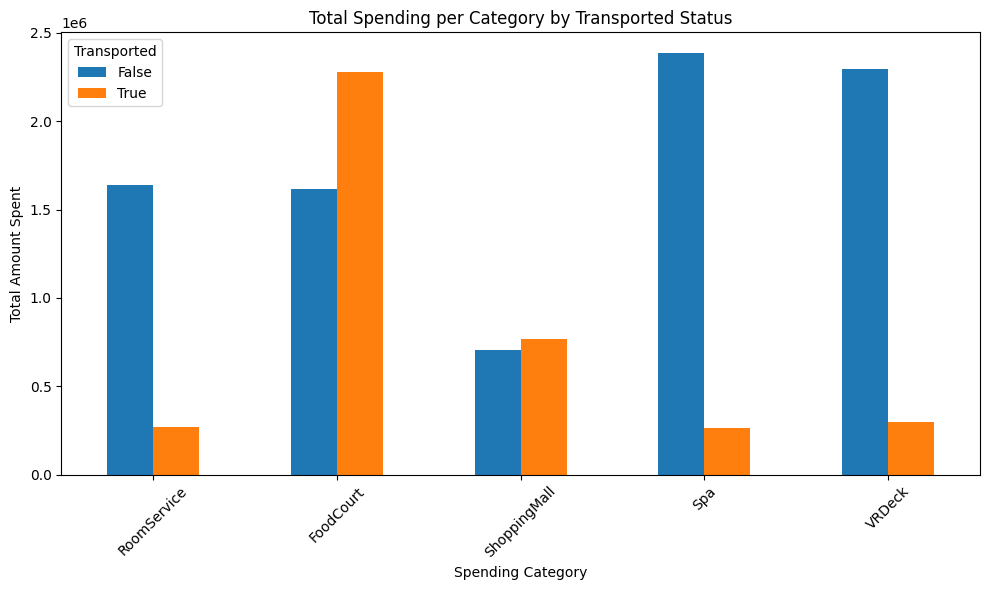

In [3]:
spending_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

df_train[spending_cols] = df_train[spending_cols].fillna(0)

spending_summary = df_train.groupby("Transported")[spending_cols].sum()

spending_summary.T.plot(kind='bar', figsize=(10,6))

plt.title("Total Spending per Category by Transported Status")
plt.xlabel("Spending Category")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.legend(title="Transported")
plt.tight_layout()
plt.show()


/home/codenam/Github/ml-spaceship-titanic/.venv/lib/python3.13/site-packages/matplotlib/axes/_axes.py:7132: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


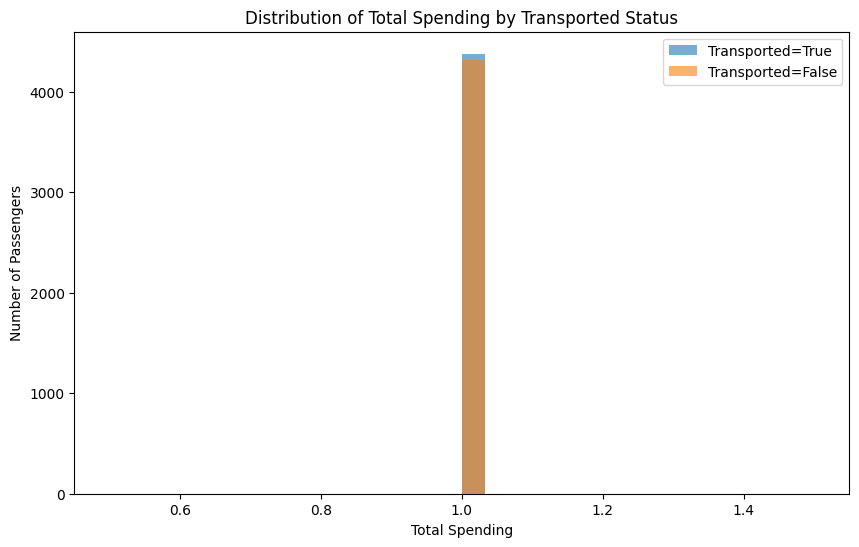

In [18]:
df_train['TotalSpending'] = df_train[spending_cols].sum(axis=1).skipna=True

plt.figure(figsize=(10,6))

for status, color in zip([True, False], ['skyblue', 'orange']):
    subset = df_train[df_train['Transported'] == status]
    plt.hist(subset['TotalSpending'], bins=30, alpha=0.6, label=f"Transported={status}")

plt.title("Distribution of Total Spending by Transported Status")
plt.xlabel("Total Spending")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# I - Observation

- Passengers who used services are less likely to be transported and vice versa.

- RoomService, Spa and VRDeck are the columns with the most impact on the target variable "Transported" having a much lower chance of getting transported when used. Whereas FoodCourt slightly increases the chance of being transported.

# II - Theory

- Home planets have an impact on destination.
- Home planets have an impact on the likelihood of being transported.

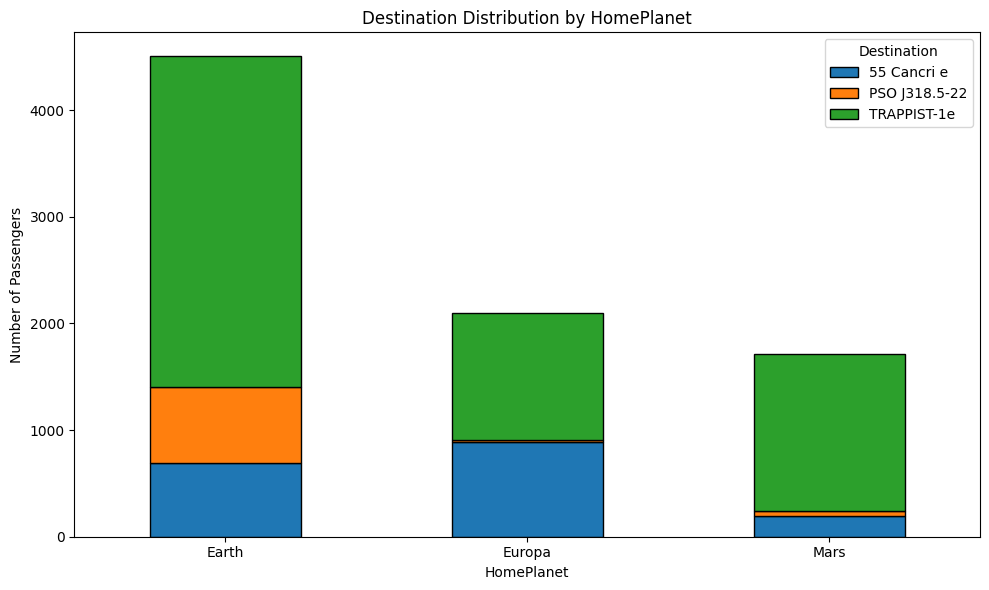

In [ ]:
# Count number of passengers for each combination of HomePlanet and Destination
home_vs_dest = df_train.groupby(['HomePlanet', 'Destination']).size().unstack(fill_value=0)

# Plot stacked bar chart
home_vs_dest.plot(kind='bar', stacked=True, figsize=(10,6), edgecolor='black')


plt.title("Destination Distribution by HomePlanet")
plt.xlabel("HomePlanet")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.legend(title="Destination")
plt.tight_layout()
plt.show()


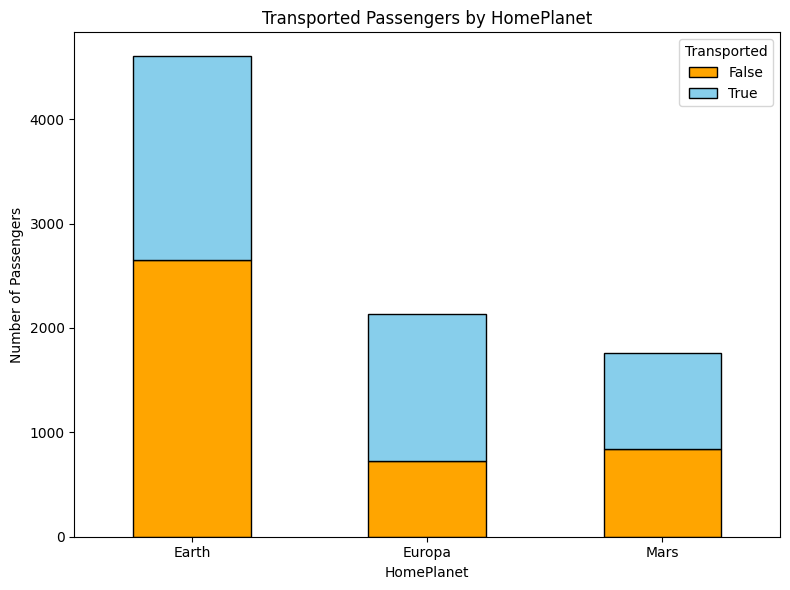

In [12]:
home_vs_transport = df_train.groupby(['HomePlanet', 'Transported']).size().unstack(fill_value=0)

home_vs_transport.plot(kind='bar', stacked=True, figsize=(8,6), edgecolor='black', color=['orange', 'skyblue'])

plt.title("Transported Passengers by HomePlanet")
plt.xlabel("HomePlanet")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.legend(title="Transported")
plt.tight_layout()
plt.show()


II - Observation

- {*INCONCLUANT*} Passengers from Earth have a higher chance of going to TRAPPIST-1e.
- {*INCONCLUANT*} Passengers from Europa are slightly less likely to be transported.

III - Theory

- VIP status has an impact on the likelihood of being transported.
- Deck level has an impact on the likelihood of being transported.

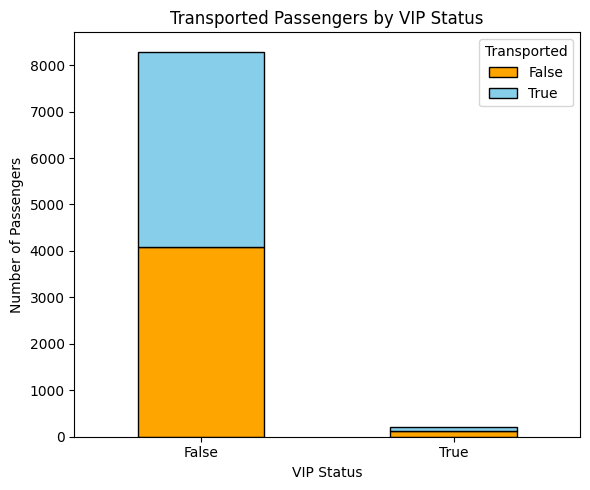

In [ ]:
cryosleep_vs_transport = df_train.groupby(['VIP', 'Transported']).size().unstack(fill_value=0)

# Plot stacked bar chart
cryosleep_vs_transport.plot(kind='bar', stacked=True, figsize=(6,5), edgecolor='black', color=['orange', 'skyblue'])

plt.title("Transported Passengers by VIP Status")
plt.xlabel("VIP Status")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.legend(title="Transported")
plt.tight_layout()
plt.show()


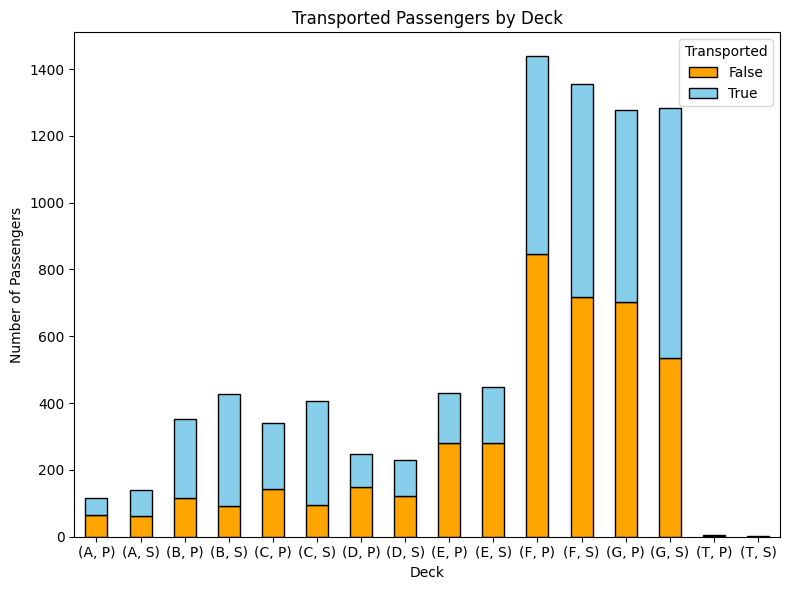

In [14]:
# Split Cabin into Deck, Num, Side
cabin_split = df_train['Cabin'].str.split('/', expand=True)
df_train['Deck'] = cabin_split[0]
df_train['Num'] = cabin_split[1]
df_train['Side'] = cabin_split[2]

transport_by_cabin = df_train.groupby(['Deck', 'Num', 'Side', 'Transported']).size().unstack(fill_value=0)

deck_side_transport = df_train.groupby(['Deck', 'Side', 'Transported']).size().unstack(fill_value=0)

deck_side_transport.plot(kind='bar', stacked=True, figsize=(8,6), edgecolor='black', color=['orange', 'skyblue'])
plt.title("Transported Passengers by Deck")
plt.xlabel("Deck")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.legend(title="Transported")
plt.tight_layout()
plt.show()


III - Observation

- {*INCONCLUANT*} VIP passengers do not affect the likelihood of being transported.
- {*INCONCLUANT*} Passengers on higher decks are slightly more likely to be transported.

IV - Theory

- CryoSleep status has an impact on the likelihood of being transported.

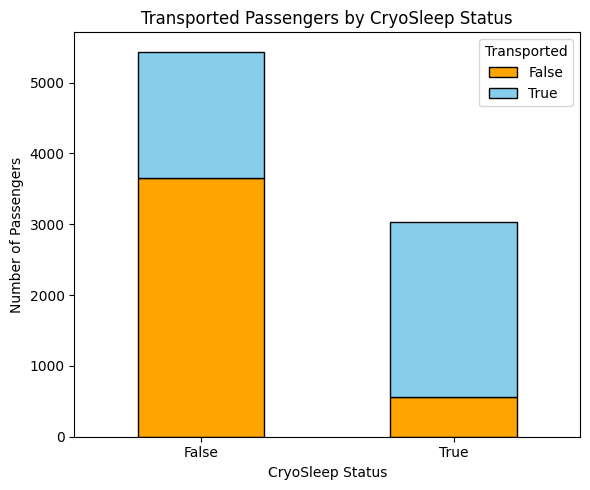

In [15]:
cryosleep_vs_transport = df_train.groupby(['CryoSleep', 'Transported']).size().unstack(fill_value=0)

# Plot stacked bar chart
cryosleep_vs_transport.plot(kind='bar', stacked=True, figsize=(6,5), edgecolor='black', color=['orange', 'skyblue'])

plt.title("Transported Passengers by CryoSleep Status")
plt.xlabel("CryoSleep Status")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.legend(title="Transported")
plt.tight_layout()
plt.show()


IV - Theory

- CryoSleep status affects the likelihood of being transported, those awake having a higher chance of being transported compared to those in CryoSleep.